## Hurricane Katrina Review -Insurance

### Import Variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Bring in dataset***

In [ ]:
roadhome=pd.read_csv("https://raw.githubusercontent.com/wujenny214/Policy-Study-into-Grant-Assistance-for-Post-Hurricane-Rebuilding-Efforts/refs/heads/main/data/roadhome_for_datastore.csv")

C:\Users\atrey\AppData\Local\Temp\ipykernel_24876\3931741176.py:1: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  roadhome=pd.read_csv("roadhome_for_datastore.csv")


***Clean data***

In [ ]:
roadhome=roadhome[roadhome["GIS State"]=="LA"]
roadhome=roadhome[roadhome["ARS File (Yes/No)"]=="N"]

***Summarize the Pre-Storm value***

In [6]:
roadhome["Current PSV"].describe()

count    1.300530e+05
mean     1.365617e+05
std      9.777843e+04
min      1.000000e+00
25%      8.500000e+04
50%      1.220000e+05
75%      1.640000e+05
max      3.400000e+06
Name: Current PSV, dtype: float64

***Checking the property value by quantile to identify lower-income residents, and associate with property***

In [82]:
roadhome["Current PSV"].quantile(0.2)

np.float64(75000.0)

***Bin by property value to illustrate disparity in insurance***

In [ ]:
bins = [0, 40000, 80000, 120000, 160000, 200000, 240000, float("inf")]
labels = ["<$40K", "$40–80K", "$80–120K", "$120–160K", \
          "$160-200K","$200-240K","$240K+"]

In [ ]:
roadhome["property_bucket"] = pd.cut(roadhome["Current PSV"], \
            bins=bins, labels=labels, include_lowest=True)

***Segment by bucket***

In [52]:
roadhome["property_bucket"].value_counts()

property_bucket
$80–120K     31909
$120–160K    30471
$40–80K      14990
$160-200K    12828
<$40K        12356
$240K+       12077
$200-240K     6494
Name: count, dtype: int64

***Recode Insurance holders to represent "Y" with "1" and "N" with "0"***

In [ ]:
roadhome["insurance_num"] = roadhome["Applicant With\
 Current Insurance (Private and/or Flood) Y/N\
"].map({"Y": 1, "N": 0})

***Prepare table to compute proportion of people with insurance by property value group***

In [ ]:
avg_response = roadhome.groupby("property_bucket")\
["insurance_num"].mean().reset_index()

print(avg_response)

  property_bucket  insurance_num
0           <$40K       0.277355
1         $40–80K       0.640694
2        $80–120K       0.829108
3       $120–160K       0.906961
4       $160-200K       0.919863
5       $200-240K       0.929011
6          $240K+       0.938809


C:\Users\atrey\AppData\Local\Temp\ipykernel_24876\2331860686.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_response = roadhome.groupby("property_bucket")["insurance_num"].mean().reset_index()


***Graph chart showing insurance non-holders by property value bracket***

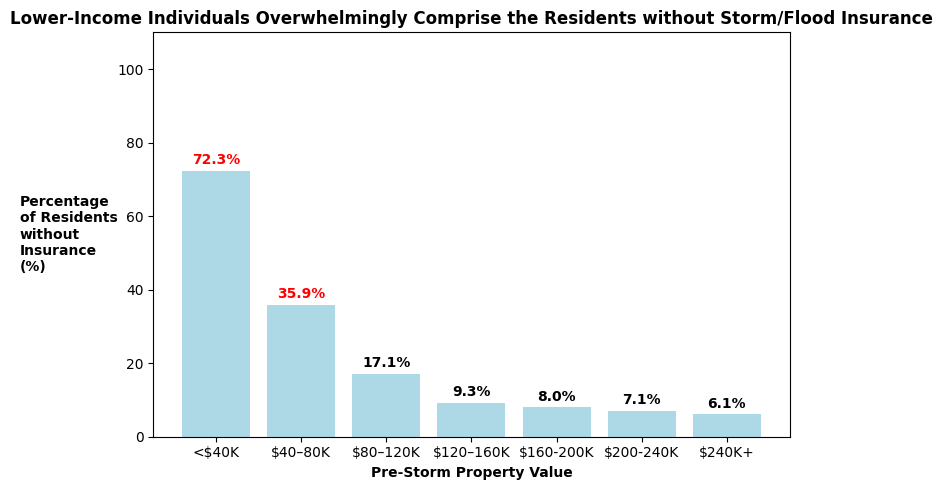

In [ ]:
#Graph chart
plt.figure(figsize=(8,5))
bars = plt.bar(avg_response["property_bucket"], \
(1-avg_response["insurance_num"]) * 100, color='lightblue')

#Assign axis labels
plt.xlabel("Pre-Storm Property Value", fontweight="bold")
plt.ylabel(
    "Percentage\nof Residents\nwithout\nInsurance\n(%)",
    fontweight="bold",
    rotation=0,
    labelpad=70,
    va='center',
    ha='left'
)
plt.title("Lower-Income Individuals \
Overwhelmingly Comprise the Residents without\
 Storm/Flood Insurance", fontweight='bold')
plt.ylim(0,110)

#Prepare bar labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    label_color = 'red' if (i == 0 or i==1) else 'black'
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontweight='bold',
        color=label_color
    )
    


plt.tight_layout()
plt.show()

### Compute Insurance Duplicative Benefits

***Compute duplicative benefits and its proportion of house value***

In [ ]:
roadhome["DOB Proportion"]=(roadhome\
["Closing Total DOB Amount"]/roadhome["Current PSV"])*100

***Take mean of insurance holders and non-insurance holders***

In [ ]:
avg_dup_ben = roadhome.groupby("insurance_num")\
    ["DOB Proportion"].mean().reset_index()

In [91]:
avg_dup_ben

,insurance_num,DOB Proportion
0,0,13.537827
1,1,58.640874


***Scatter Plot of Insurance and Non-insurance holders***

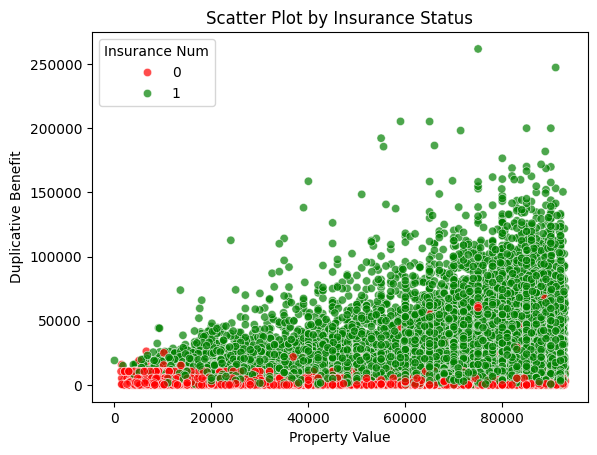

In [ ]:
#Scatter Plot
sns.scatterplot(
    data=roadhome,
    x="Current PSV",
    y="Closing Total DOB Amount",
    hue="insurance_num",  
    palette={0: "red", 1: "green"}, 
    alpha=0.7                
)

plt.xlabel("Property Value")
plt.ylabel("Duplicative Benefit")
plt.title("Scatter Plot by Insurance Status")
plt.legend(title="Insurance Num")
plt.show()